# Wie können Marienkäfer von Raupen unterschieden werden?

## Vorbereitung

<div class="alert alert-block alert-success">

Uns liegt also ein Datensatz für 200 Marienkäfer und Raupen vor. Diese Daten benutzen wir, um das System zu **trainieren**, damit es später unbekannte Insekten als Käfer bzw. Raupe erkennen kann.

<div class="alert alert-block alert-info">

Zur Vorbereitung werden wieder einige notwendige Bibliotheken sowie die Daten eingelesen.
    
**Führe also die folgenden beiden Zellen aus:**

In [1]:
import pandas as pd
import plotly.express as px
from PyTree import ClassificationTree as ct
import ipywidgets as widgets

color_map = {'Marienkäfer': 'orange', 'Raupe': 'lightblue'}

data_x = "Breite"
data_y = "Länge"
target = "Insekt"
breite=800
hoehe=600

In [2]:
df_kaefer = pd.read_csv("Daten/Kaefer_mm.csv", sep=";")
display(df_kaefer)

,Breite,Länge,Insekt
0,12.19,9.65,Marienkäfer
1,8.13,18.80,Raupe
2,12.45,6.86,Marienkäfer
3,14.73,11.68,Marienkäfer
4,2.79,14.73,Raupe
...,...,...,...
195,14.48,9.40,Marienkäfer
196,2.54,13.72,Raupe
197,9.91,20.57,Raupe
198,14.22,7.37,Marienkäfer


In [3]:
max_x = max(df_kaefer ["Breite"])
min_x = min(df_kaefer ["Breite"])
max_y = max(df_kaefer ["Länge"])
min_y = min(df_kaefer ["Länge"])

delta_x = (max_x - min_x)
delta_y = (max_y - min_y)

bereich_x = [int(min_x - delta_x*0.05), int(max_x + delta_x*0.05)]
bereich_y = [int(min_y - delta_y*0.05), int(max_y + delta_y*0.05)]

## Automatisch wird ein Entscheidungsbaum erstellt


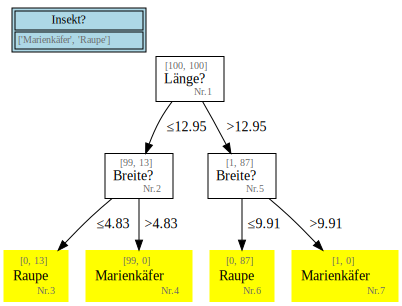

In [13]:
tree = ct.DecisionTree(target = 'Insekt', data = df_kaefer)

#Entscheidungsbaum erstellen 
tree.grow_tree(df_kaefer, 'Insekt')

#Entscheidungsbaum ausgeben
tree.print_tree()

## Testdaten

<div class="alert alert-block alert-success">
  
Wir haben es jetzt erreicht, dass **fast alle** Trainingsdaten korrekt klassifiziert werden.

- Das ist in der Praxis sehr selten!
    
Wir belassen es jetzt einmal bei unserem trainierten Entscheidungsbaum, sollten dennoch einen weiteren Test starten.

<div class="alert alert-block alert-success">
  
Um die Qualität des Entscheidungsbaumes zu testen, haben wir jetzt die folgende Idee:
- Wir haben weitere Datensätze von bekannten Insekten, also von Insekten, von denen wir wissen, ob es sich um Raupen oder Marienkäfer handelt. Diese Datensätze lassen wir durch den Entscheidungsbaum klaasifizieren, und prüfen dann, ob der tatsächliche Insektentyp mit der Vorhersage des Entscheidungsbaumes übereinstimmt.
    
Hier nochmal der Entscheidungsbaum:

<div class="alert alert-block alert-success">
  
Zum Testen haben wir jetzt weitere Datensätze vorbereitet:

In [18]:
df_testdaten = pd.read_csv("Daten/Kaefer_Testdaten_mm.csv", sep=";")
df_testdaten

,Breite,Länge,Insekt
0,10.67,7.37,Marienkäfer
1,9.91,23.37,Raupe
2,9.91,8.13,Marienkäfer
3,13.46,11.18,Marienkäfer
4,17.27,13.46,Marienkäfer
...,...,...,...
197,12.95,8.89,Marienkäfer
198,4.83,17.78,Raupe
199,14.48,7.37,Marienkäfer
200,4.06,15.24,Raupe


<div class="alert alert-block alert-success">
  
Und jetzt sind wir gespannt auf den Qualitätstest:

In [19]:
lst1 = []
lst2 = []
lst3 = []
lstBreite = []
lstLaenge = []

fehlerzahl = 0

for ind in df_testdaten.index:
    eintrag={df_testdaten.columns[0]:df_testdaten.values[ind][0], 
             df_testdaten.columns[1]:df_testdaten.values[ind][1]}
    breite = df_testdaten.values[ind][0]
    laenge = df_testdaten.values[ind][1]
    ist = tree.query (eintrag)   # sagt der DecTree
    sol = df_testdaten.values[ind][2] # das Label
    
    if ist == sol:
        errEntry = "korrekt erkannt"
    else:
         errEntry = "fehlerhaft klassifiziert"
         fehlerzahl += 1
            
    lstBreite += [breite]
    lstLaenge += [laenge]
    lst1 += [ist]
    lst2 += [sol]
    lst3 += [errEntry]
    ind = ind + 1

df = pd.DataFrame ({df_testdaten.columns[0]: lstBreite, 
                    df_testdaten.columns[1]: lstLaenge, 
                    "tatsächlich": lst2, 
                    "Entscheidungsbaum sagt": lst1, 
                    "Kommentar": lst3})

print ("Es gib", fehlerzahl, "fehlerhafte Klassifikationen")
df

Es gib 16 fehlerhafte Klassifikationen


,Breite,Länge,tatsächlich,Entscheidungsbaum sagt,Kommentar
0,10.67,7.37,Marienkäfer,Marienkäfer,korrekt erkannt
1,9.91,23.37,Raupe,Raupe,korrekt erkannt
2,9.91,8.13,Marienkäfer,Marienkäfer,korrekt erkannt
3,13.46,11.18,Marienkäfer,Marienkäfer,korrekt erkannt
4,17.27,13.46,Marienkäfer,Marienkäfer,korrekt erkannt
...,...,...,...,...,...
197,12.95,8.89,Marienkäfer,Marienkäfer,korrekt erkannt
198,4.83,17.78,Raupe,Raupe,korrekt erkannt
199,14.48,7.37,Marienkäfer,Marienkäfer,korrekt erkannt
200,4.06,15.24,Raupe,Raupe,korrekt erkannt


<div class="alert alert-block alert-success">
  
Tatsächlich gibt es also 16 Insekten, die falsch klassifiziert wurden.

In [20]:
data = [df_kaefer, df_testdaten]
df_all_data = pd.concat(data,ignore_index=True)

In [23]:
import plotly.express as px

tree = ct.DecisionTree(target="Insekt", data=df_all_data)

#fehlersumme = calc_errors(hor, tree, "Länge")
#fehlersumme = tree.calculate_errors(data = df_kaefer) 

color_map = {'Marienkäfer': 'orange', 'Raupe': 'lightblue'}

fig = px.scatter(
    df_all_data,
    x="Breite",
    y="Länge",
    color="Insekt",
    color_discrete_map=color_map,
    width=800,
    height=600,
    range_x=bereich_x,
    range_y=bereich_y,
    #size = 0.01
)

fig.update_traces(marker=dict(  #size=5, 
    line=dict(width=1, color='black')))


fig.update_layout(shapes=[

])

fig.show()